In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [57]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
df = pd.read_csv('/content/Covertype.csv')

In [59]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [60]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

As we can see that classes are imbanaced and we have good number of observations for cover type 2 and 1. For cover type 4 and 5, we have less number of observations.

In [61]:
len(df)

581012

In [62]:
X = df.drop('Cover_Type', axis = 1)
y = df['Cover_Type']

In [63]:
y.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

Checking null values

In [64]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


There is no missing values in the dataset

EDA(Univariate)

In [65]:
selected_variables = df.filter(['Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points'], axis=1)

In [66]:
selected_variables.head(2)

,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,510,221,232,148,6279
1,390,220,235,151,6225


In [67]:
selected_variables.describe()

,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,7117.000000,254.000000,254.000000,254.000000,7173.000000


Text(0, 0.5, 'Hillshade_3pm')

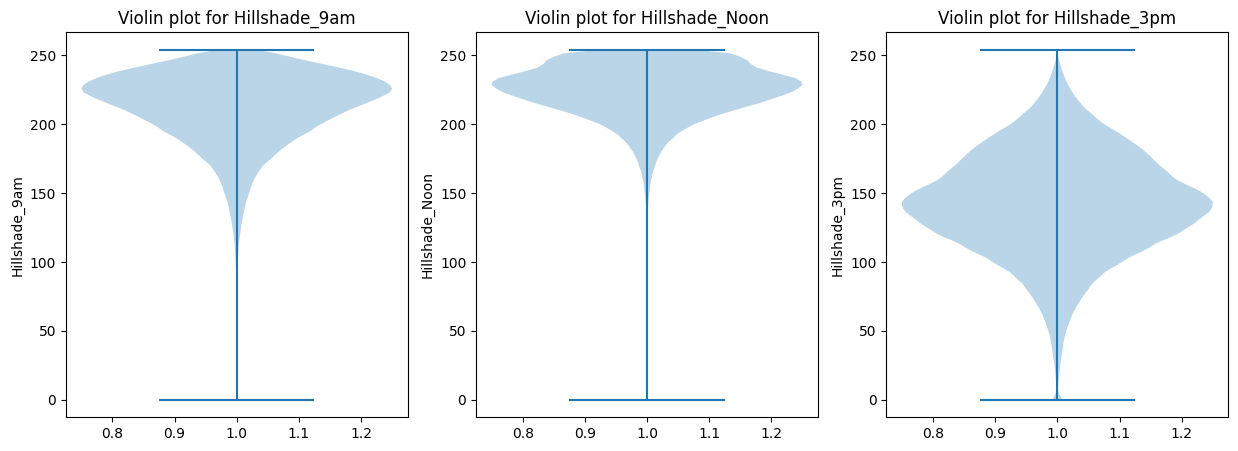

In [68]:

fig,ax = plt.subplots(1,3,figsize = (15,5))

ax[0].violinplot(selected_variables['Hillshade_9am'])
ax[0].title.set_text('Violin plot for Hillshade_9am')
ax[0].set_ylabel('Hillshade_9am')
ax[1].violinplot(selected_variables['Hillshade_Noon'])
ax[1].title.set_text('Violin plot for Hillshade_Noon')
ax[1].set_ylabel('Hillshade_Noon')
ax[2].title.set_text('Violin plot for Hillshade_3pm')
ax[2].violinplot(selected_variables['Hillshade_3pm'])
ax[2].set_ylabel('Hillshade_3pm')

Text(0, 0.5, 'Horizontal_Distance_To_Fire_Points')

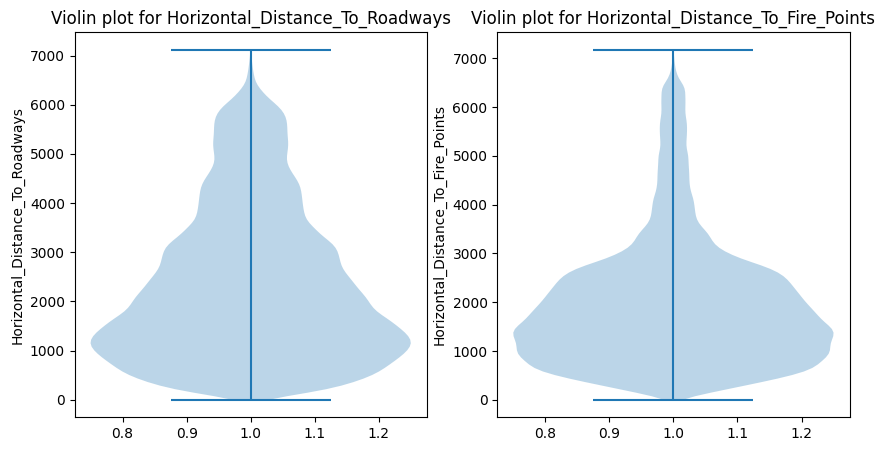

In [69]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize = (10,5))

ax[0].violinplot(selected_variables['Horizontal_Distance_To_Roadways'])
ax[0].title.set_text('Violin plot for Horizontal_Distance_To_Roadways')
ax[0].set_ylabel('Horizontal_Distance_To_Roadways')
ax[1].violinplot(selected_variables['Horizontal_Distance_To_Fire_Points'])
ax[1].title.set_text('Violin plot for Horizontal_Distance_To_Fire_Points')
ax[1].set_ylabel('Horizontal_Distance_To_Fire_Points')

Checking collinearity between the numerical features

Method 1

In [70]:
X = add_constant(selected_variables)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const                                 550.105967
Horizontal_Distance_To_Roadways         1.168658
Hillshade_9am                          23.324557
Hillshade_Noon                         13.869525
Hillshade_3pm                          35.819750
Horizontal_Distance_To_Fire_Points      1.153801
dtype: float64

Method 2

In [71]:
selected_variables['Cover_Type'] = df.Cover_Type.values

In [72]:
selected_variables.head(2)

,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,510,221,232,148,6279,5
1,390,220,235,151,6225,5


In [73]:
c = list(selected_variables.columns)
c.remove('Cover_Type')
c

['Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [74]:
features = "+".join(c)

# get y and X dataframes based on this regression:
y, X = dmatrices('Cover_Type ~' + features, selected_variables, return_type='dataframe')

In [75]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [76]:
vif.round(1)

,VIF Factor,features
0,550.1,Intercept
1,1.2,Horizontal_Distance_To_Roadways
2,23.3,Hillshade_9am
3,13.9,Hillshade_Noon
4,35.8,Hillshade_3pm
5,1.2,Horizontal_Distance_To_Fire_Points


Hillshade features is having same variance so we can keep one of the feature.